In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = "API_SP.POP.TOTL_DS2_en_csv_v2_130083.csv"
df = pd.read_csv(file_path, skiprows=4)
df.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,37885849.0,NaN


In [3]:
df.info()
df.columns[:10]  # Display first few columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965'],
      dtype='object')

In [4]:
data_2024 = df[['Country Name', '2024']].dropna()
data_2024.rename(columns={'2024': 'Population_2024'}, inplace=True)
data_2024.head()


,Country Name,Population_2024
0,Aruba,107624.0
1,Africa Eastern and Southern,769294618.0
2,Afghanistan,42647492.0
3,Africa Western and Central,521764076.0
4,Angola,37885849.0


In [5]:
top10 = data_2024.sort_values(by='Population_2024', ascending=False).head(10)
top10


,Country Name,Population_2024
259,World,8.142056e+09
103,IDA & IBRD total,6.926456e+09
140,Low & middle income,6.563720e+09
156,Middle income,5.939112e+09
102,IBRD only,4.979720e+09
62,Early-demographic dividend,3.552279e+09
139,Lower middle income,3.120984e+09
249,Upper middle income,2.818128e+09
63,East Asia & Pacific,2.388378e+09
142,Late-demographic dividend,2.328891e+09


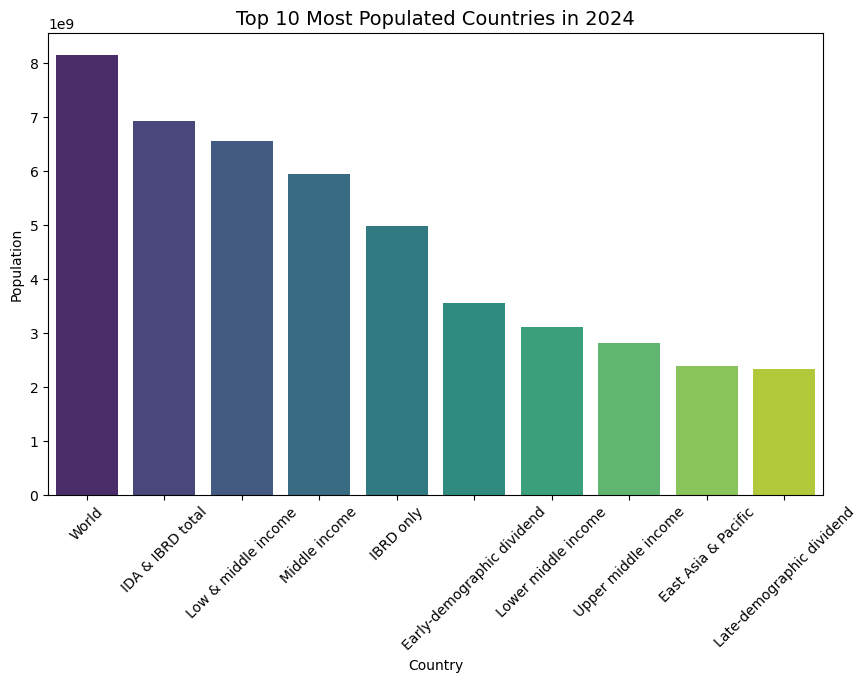

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='Country Name', y='Population_2024', hue='Country Name', data=top10, palette='viridis', legend=False)
plt.title("Top 10 Most Populated Countries in 2024", fontsize=14)
plt.xlabel("Country")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.show()


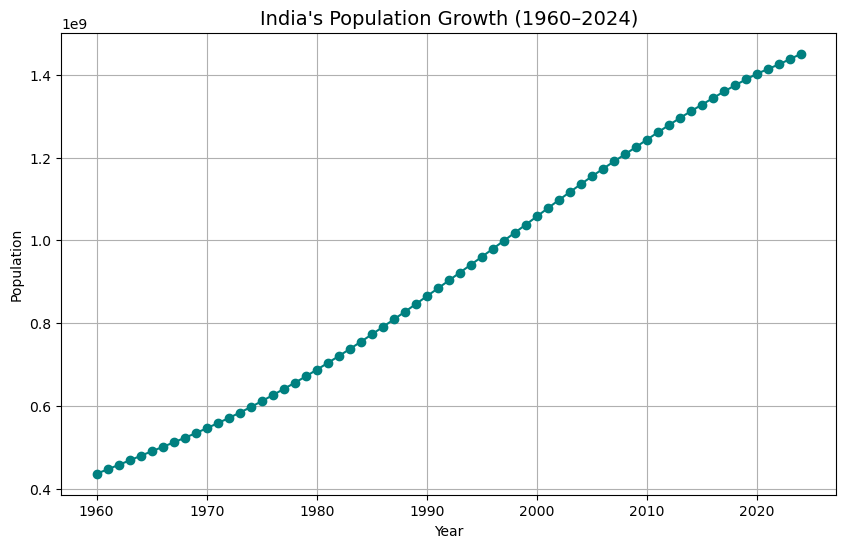

In [8]:
# Filter India's data and transpose to get Year vs Population
india = df[df['Country Name'] == 'India'].iloc[:, 4:-1].T
india.columns = ['Population']
india = india.reset_index().rename(columns={'index': 'Year'})
india['Year'] = india['Year'].astype(int)

# Line chart for India's population growth
plt.figure(figsize=(10,6))
plt.plot(india['Year'], india['Population'], color='teal', marker='o')
plt.title("India's Population Growth (1960–2024)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()


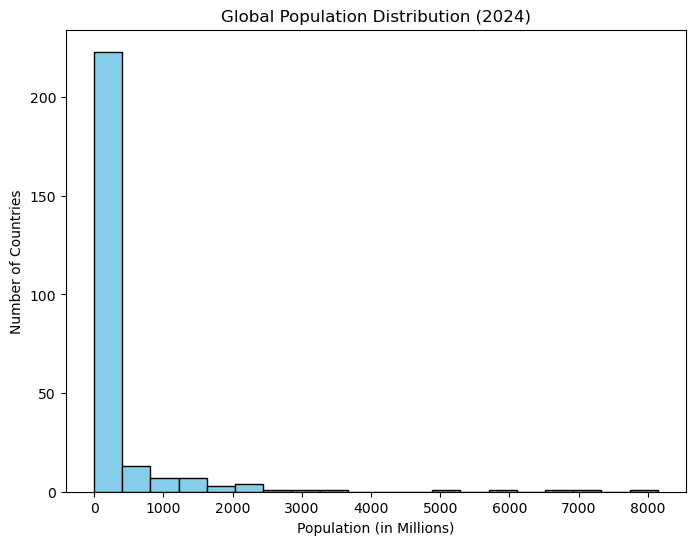

In [9]:
plt.figure(figsize=(8,6))
plt.hist(data_2024['Population_2024'] / 1e6, bins=20, color='skyblue', edgecolor='black')
plt.title("Global Population Distribution (2024)")
plt.xlabel("Population (in Millions)")
plt.ylabel("Number of Countries")
plt.show()
